In [1]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Load Mypoia Dataset

In [2]:
myopia_csv = "myopia.csv"
df = pd.read_csv(myopia_csv)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Column names
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [4]:
df.shape

(618, 15)

## Preprocess Data

In [5]:
# Split the dataframe into data and target
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [6]:
new_df = X
# new_df.head()

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create a scaler to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Train the scaler with the X_train data.
scaler.fit(X_train)

StandardScaler()

In [10]:
# Transform X_train and X_test.
# Note that the scaler used to transform X_train and X_test was trained on X_train.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Dimensionality Reduction

In [11]:
# Initialize PCA model
pca = PCA(n_components=0.9)

principal_components = pca.fit_transform(X_scaled)
principal_components.shape

(618, 10)

In [12]:
# Explained Variance Sum
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [13]:
# REDUCE WITH t-SNE

tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

/Users/myles/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/myles/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(618, 2)

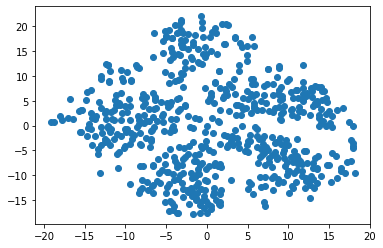

In [14]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Cluster Analysis with K-means

In [15]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(principal_components)
    inertia.append(km.inertia_)

In [16]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


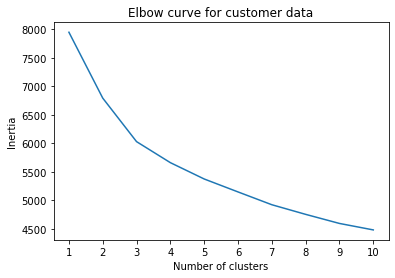

In [17]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## Analysis


Upon further analysis the myopic dataset can be distinctly broken down between 2 to 5 clusters. This is due to noticing how the features reduced from 14 to 10 with our PCA analysis, and then even further when t-SNE reduced that number to 2. Upon analysing the elbow plot we can properly see where those same dips happen. 